In [1]:
from PIL import Image
from pynq import Overlay, allocate
import numpy as np
import pynq.lib.dma
import pynq.lib.video
import time
import cv2
from pynqmetadata.frontends import Metadata
from pynq import PL
import pynq.mmio
from pynq import MMIO

# PL.reset()

# Load the overlay
overlay = Overlay("/home/xilinx/jupyter_notebooks/kevin/overlay14/design_1.bit", download=True)
help(overlay)
# overlay.ip_dict

Help on Overlay in module pynq.overlay:

<pynq.overlay.Overlay object>
    Default documentation for overlay /home/xilinx/jupyter_notebooks/kevin/overlay14/design_1.bit. The following
    attributes are available on this overlay:
    
    IP Blocks
    ----------
    cvtcolor_og_0        : pynq.overlay.DefaultIP
    processing_system7_0 : pynq.overlay.DefaultIP
    
    Hierarchies
    -----------
    None
    
    Interrupts
    ----------
    None
    
    GPIO Outputs
    ------------
    None
    
    Memories
    ------------
    PSDDR                : Memory



In [2]:
cvt = overlay.cvtcolor_og_0
cvt.register_map

RegisterMap {
  CTRL = Register(AP_START=0, AP_DONE=0, AP_IDLE=1, AP_READY=0, RESERVED_1=0, AUTO_RESTART=0, RESERVED_2=0, INTERRUPT=0, RESERVED_3=0),
  GIER = Register(Enable=0, RESERVED=0),
  IP_IER = Register(CHAN0_INT_EN=0, CHAN1_INT_EN=0, RESERVED_0=0),
  IP_ISR = Register(CHAN0_INT_ST=0, CHAN1_INT_ST=0, RESERVED_0=0),
  img_bgr_1 = Register(img_bgr=write-only),
  img_bgr_2 = Register(img_bgr=write-only),
  img_gray_1 = Register(img_gray=write-only),
  img_gray_2 = Register(img_gray=write-only),
  rows = Register(rows=write-only),
  cols = Register(cols=write-only)
}

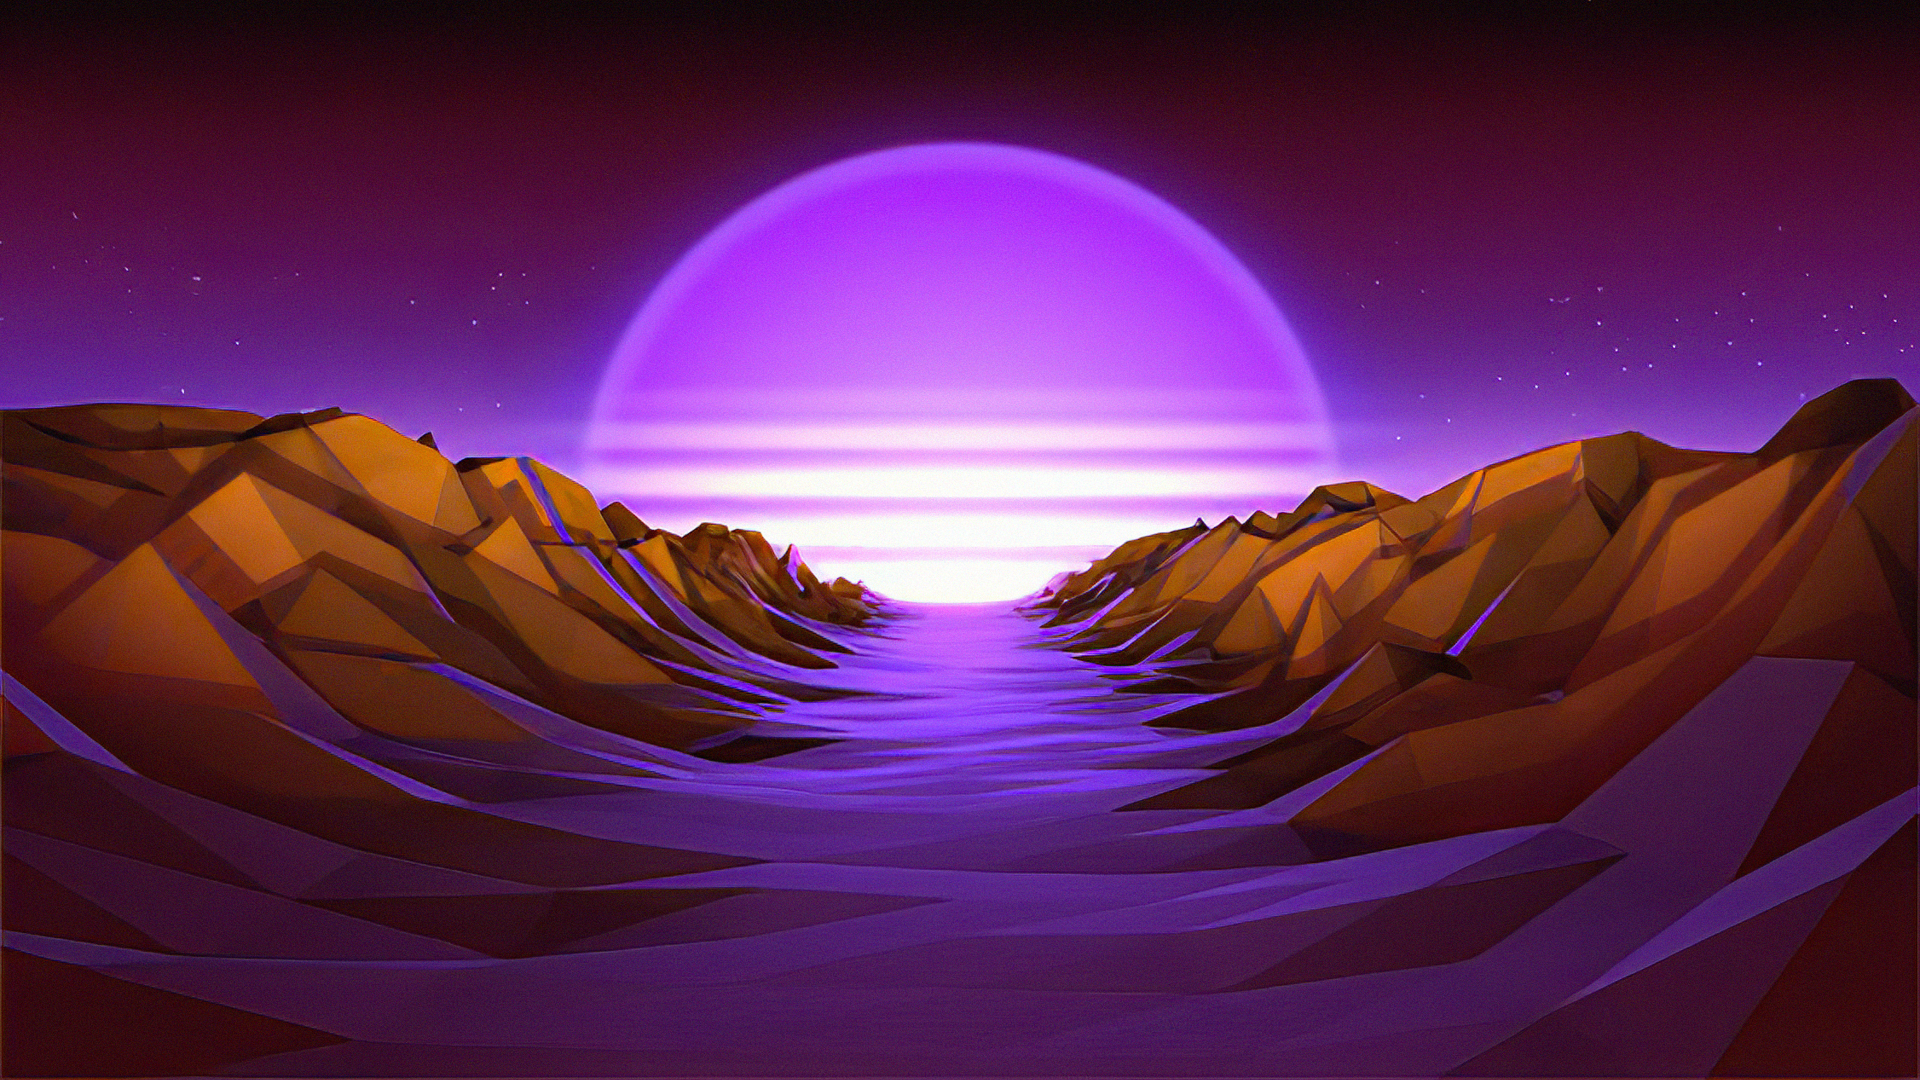

In [5]:
img_path = "/home/xilinx/jupyter_notebooks/kevin/ip24/src/lol.jpg"

img = cv2.imread(img_path,-1) # Note: OpenCV uses BGR format default

height, width, channel = img.shape

in_buffer = allocate(shape=(height,width,channel), dtype=np.uint8)
out_buffer = allocate(shape=(height,width), dtype=np.uint8)

in_buffer[:] = img

buf_image = Image.fromarray(in_buffer)
display(buf_image)

In [21]:
ip_base_addr_ctrl = 0x40000000
addr_range = 0xFFFF

mmio = MMIO(ip_base_addr_ctrl, addr_range)

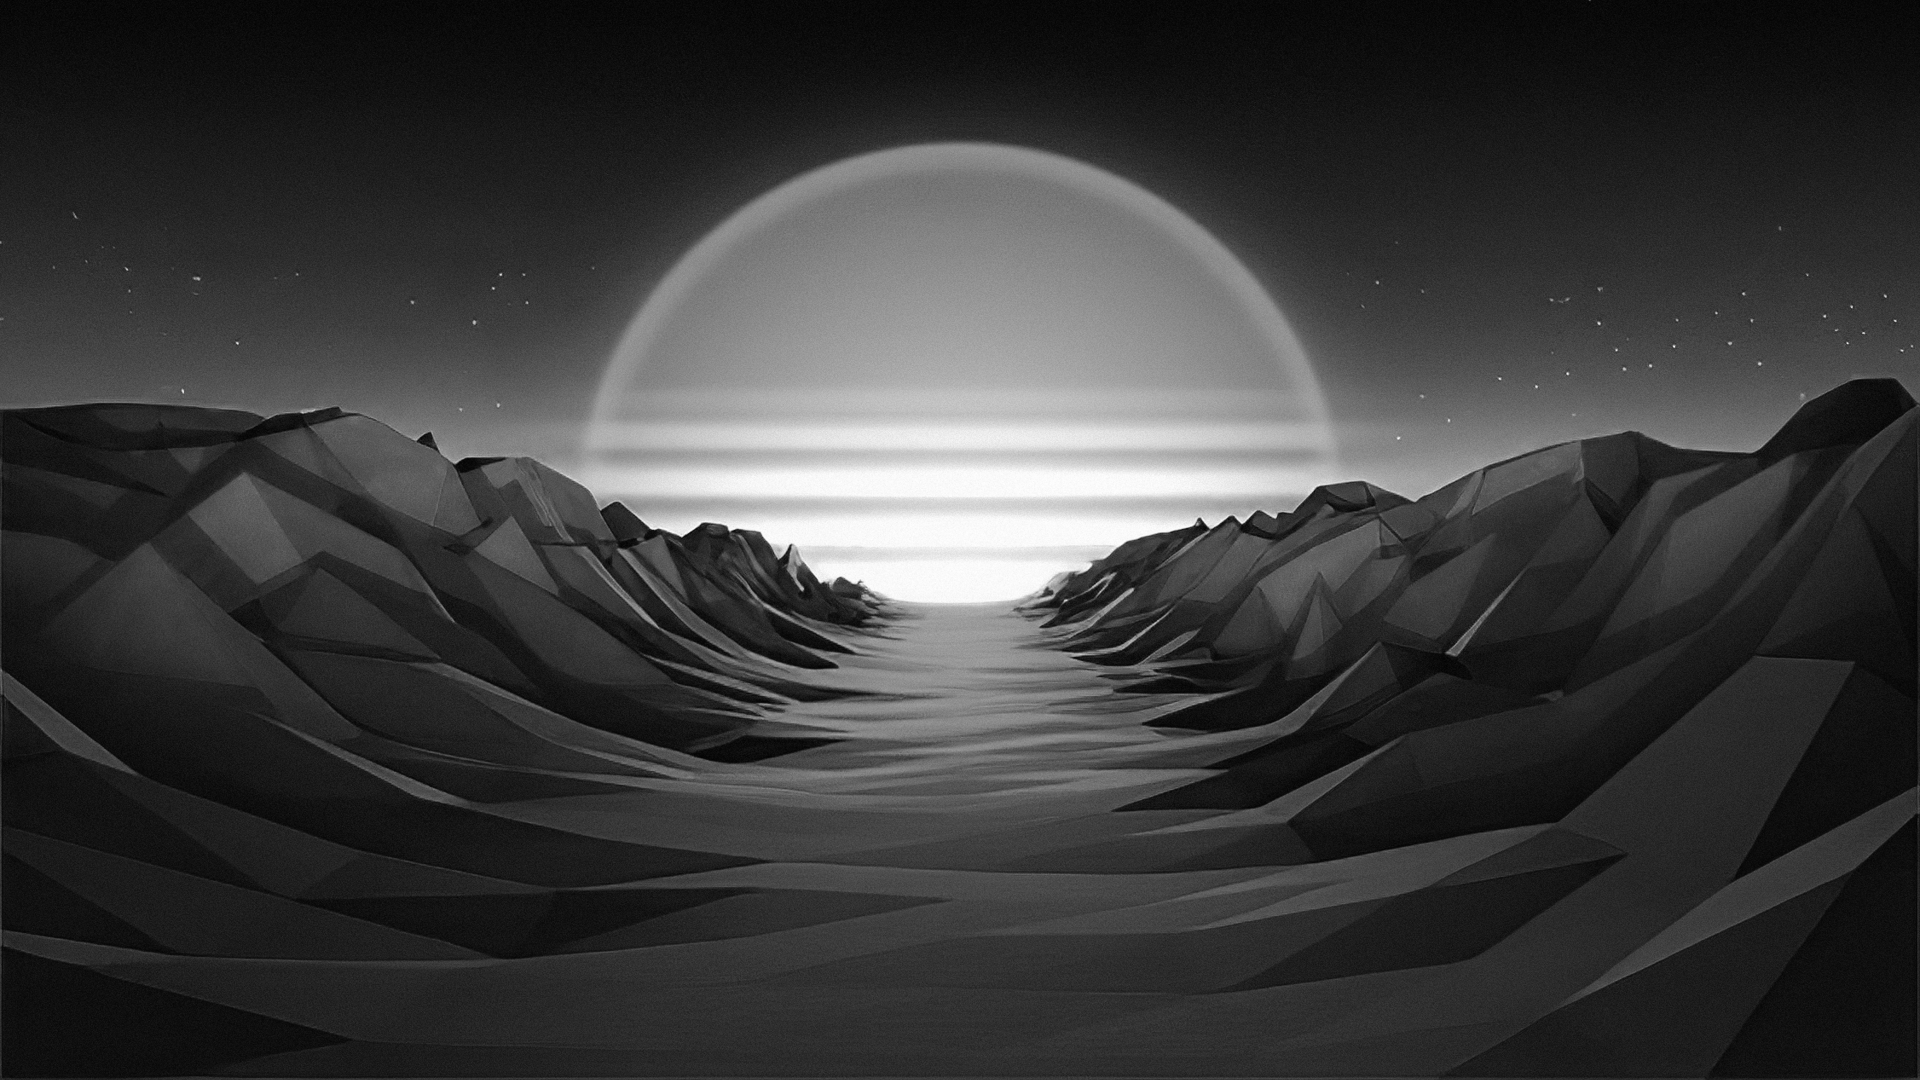

<bound method PynqBuffer.flush of PynqBuffer([[10,  5,  9, ...,  7,  5,  8],
            [ 9, 11, 13, ..., 11,  9,  6],
            [ 5, 12,  8, ...,  6,  5,  6],
            ...,
            [36, 44, 18, ..., 36, 58, 49],
            [40, 38, 40, ..., 52, 57, 58],
            [43, 40, 47, ..., 56, 57, 60]], dtype=uint8)>

In [23]:
mmio.write(0x00,2)
mmio.write(0x28, height)
mmio.write(0x30, width)

mmio.write(0x10,in_buffer.device_address)
mmio.write(0x1c,out_buffer.device_address)

mmio.write(0x00,0x1)

buf_image = Image.fromarray(out_buffer)
display(buf_image)

in_buffer.flush
out_buffer.flush